## Computing  $\pi$ with Monte Carlo Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Compute  the value of $\pi$ by randomly throwing N points onto a square with sides of 2 cm, inside which a circle of radius 1 cm is inscribed. The ratio between the area of the circle and the area of the square will tend to be equal to the number of points inside the circle divided by the total number of points.

In [2]:
def mc_pi_aprox(N):
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    return pi, x, y, interior

### Plotting the points outside and inside the circel

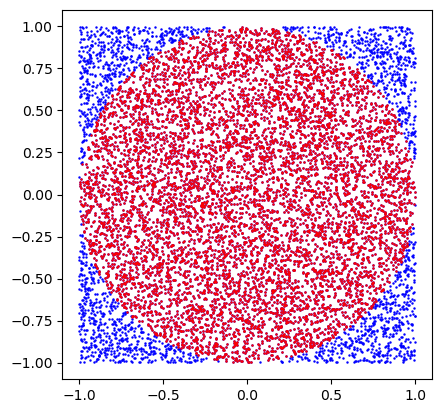

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [3]:
resultado=mc_pi_aprox(10000)
pi=resultado[0]
#plt.figure()
plt.plot(resultado[1],resultado[2],'b.',markersize=1.5)
plt.plot(resultado[1][resultado[3]],resultado[2][resultado[3]],'r.',markersize=1.5)
#plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}'
#             .format(pi), alpha=0)
plt.axis('square')
#plt.legend(frameon=True, framealpha=0.9, fontsize=16)
#mc_pi_aprox(10000)
plt.show()
plt.close

 #### The estimation of $\pi$ is repeated with N points a number of times equal to Npruebas, and the mean value and standard deviation of the sample are calculated.

In [7]:
def getEst(Npuntos,Npruebas):
    res=[]
    for i in range(Npruebas):
        res.append(mc_pi_aprox(Npuntos)[0])
    res=np.array(res)
    mu=np.mean(res)
    std=np.std(res)
    return mu,std

In [11]:
getEst(10000,100)

(np.float64(3.1408320000000005), np.float64(0.014907896431086457))

#### Exercise 1: For a fixed value of Npruebas, calculate the value of $\pi$ such that the standard deviation is less than $10^{-5}$.

#### Exercise 2: Calcuate the integral of the function f(x)=sin(x) from 0 to pi/2 using the a Monte Carlo method similar to the one used to estimate $\pi$


#### Computation of an integral using a Markov Chain Monte Carlo Method

In [ ]:
import numpy as np

# Parameters
a, b = 0, np.pi
F_max = 1.0  # max value of sin(x) in [0, pi]
N_steps = 100000

# Initialize Markov chain
x, y = np.random.uniform(a, b), np.random.uniform(0, F_max)
N_hits = 0

for _ in range(N_steps):
    # Propose new point
    dx = np.random.normal(0, 0.1)
    dy = np.random.normal(0, 0.1)
    x_new = x + dx
    y_new = y + dy

    # Check bounds
    if a <= x_new <= b and 0 <= y_new <= F_max:
        x, y = x_new, y_new
        # Hit or miss
        if y < np.sin(x):
            N_hits += 1
    # If out of bounds, stay at current position

# Estimate integral
integral = (b - a) * F_max * N_hits / N_steps
print(f"Estimated integral of sin(x) from 0 to pi (Markov chain): {integral}")

#### Exercise: Calculate the $\int_0^2 e^{-2 x} \cos(x) dx$ i) with naive MonteCarlo ii) with importance sampling